# Hackathon santé

Peut-on établir un lien entre la densité de médecins par spécialité et par territoire et la pratique du dépassement d'honoraires ? Est-ce dans les territoires où la densité est la plus forte que les médecins pratiquent le moins les dépassement d'honoraires ? Est-ce que la densité de certains médecins / praticiens est corrélée à la densité de population pour certaines classes d'âges (bébé/pédiatre, personnes agées / infirmiers etc...) ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_densite = pd.read_excel('Effectif_et_densite_par_departement_en_2014.xls',
                           sheet_name='Spécialistes', usecols=4, na_values='nc')
df_densite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 5 columns):
Spécialistes             5562 non-null object
DEPARTEMENT              5562 non-null object
EFFECTIF                 5562 non-null int64
POPULATION FRANCAISE     5562 non-null float64
DENSITE /100 000 hab.    5562 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 217.3+ KB


In [3]:
df_densite.head()

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,627405.0,2.390800
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,540409.0,4.070991
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,342593.0,5.254048
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,5,162438.0,3.078097
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,7,141911.0,4.932669


In [4]:
df_densite['IndexPerso'] = df_densite['Spécialistes'].str.extract(
    '(^[\d]{2})', expand=True) + df_densite['DEPARTEMENT'].str.extract('(^[\dAB]{2,3})', expand=True)
df_densite.head()

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,IndexPerso
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,627405.0,2.390800,0201
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,540409.0,4.070991,0202
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,342593.0,5.254048,0203
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,5,162438.0,3.078097,0204
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,7,141911.0,4.932669,0205


In [5]:
df_densite.count()

Spécialistes             5562
DEPARTEMENT              5562
EFFECTIF                 5562
POPULATION FRANCAISE     5562
DENSITE /100 000 hab.    5562
IndexPerso               4444
dtype: int64

In [6]:
df_densite.dropna(inplace=True)
df_densite.count()

Spécialistes             4444
DEPARTEMENT              4444
EFFECTIF                 4444
POPULATION FRANCAISE     4444
DENSITE /100 000 hab.    4444
IndexPerso               4444
dtype: int64

In [7]:
df_honoraires = pd.read_excel(
    'Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2014.xls', sheet_name='Spécialistes', na_values='nc')
df_honoraires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5459 entries, 0 to 5458
Data columns (total 7 columns):
Spécialistes                           5459 non-null object
DEPARTEMENT                            5459 non-null object
EFFECTIFS                              5459 non-null int64
HONORAIRES SANS DEPASSEMENT (Euros)    3242 non-null float64
DEPASSEMENTS (Euros)                   3242 non-null float64
FRAIS DE DEPLACEMENT (Euros)           3242 non-null float64
TOTAL DES HONORAIRES (Euros)           3242 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 298.6+ KB


In [8]:
df_honoraires.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,4421850.0,2059109.0,0.0,6480959.0
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,4655627.0,273935.0,7.0,4929569.0
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,5033545.0,462068.0,14.0,5495627.0
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,5,NaN,NaN,NaN,NaN
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,7,NaN,NaN,NaN,NaN


In [9]:
df_honoraires['IndexPerso'] = df_honoraires['Spécialistes'].str.extract(
    '(^[\d]{2})', expand=True) + df_honoraires['DEPARTEMENT'].str.extract('(^[\dAB]{2,3})', expand=True)
df_honoraires.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),IndexPerso
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,4421850.0,2059109.0,0.0,6480959.0,0201
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,4655627.0,273935.0,7.0,4929569.0,0202
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,5033545.0,462068.0,14.0,5495627.0,0203
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,5,NaN,NaN,NaN,NaN,0204
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,7,NaN,NaN,NaN,NaN,0205


In [10]:
df_honoraires.count()

Spécialistes                           5459
DEPARTEMENT                            5459
EFFECTIFS                              5459
HONORAIRES SANS DEPASSEMENT (Euros)    3242
DEPASSEMENTS (Euros)                   3242
FRAIS DE DEPLACEMENT (Euros)           3242
TOTAL DES HONORAIRES (Euros)           3242
IndexPerso                             4343
dtype: int64

In [11]:
df_honoraires.dropna(inplace=True)
df_honoraires.count()

Spécialistes                           2380
DEPARTEMENT                            2380
EFFECTIFS                              2380
HONORAIRES SANS DEPASSEMENT (Euros)    2380
DEPASSEMENTS (Euros)                   2380
FRAIS DE DEPLACEMENT (Euros)           2380
TOTAL DES HONORAIRES (Euros)           2380
IndexPerso                             2380
dtype: int64

In [12]:
df_complet = pd.merge(df_densite, df_honoraires, on='IndexPerso')
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 13 columns):
Spécialistes_x                         2380 non-null object
DEPARTEMENT_x                          2380 non-null object
EFFECTIF                               2380 non-null int64
POPULATION FRANCAISE                   2380 non-null float64
DENSITE /100 000 hab.                  2380 non-null float64
IndexPerso                             2380 non-null object
Spécialistes_y                         2380 non-null object
DEPARTEMENT_y                          2380 non-null object
EFFECTIFS                              2380 non-null int64
HONORAIRES SANS DEPASSEMENT (Euros)    2380 non-null float64
DEPASSEMENTS (Euros)                   2380 non-null float64
FRAIS DE DEPLACEMENT (Euros)           2380 non-null float64
TOTAL DES HONORAIRES (Euros)           2380 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 260.3+ KB


In [13]:
df_complet.drop(columns=['IndexPerso', 'Spécialistes_y', 'DEPARTEMENT_y', 'EFFECTIFS',
                         'HONORAIRES SANS DEPASSEMENT (Euros)', 'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'], inplace=True)
df_complet.rename(index=str, columns={
    'Spécialistes_x': 'Spécialistes', 'DEPARTEMENT_x': 'DEPARTEMENT'}, inplace=True)
df_complet.head()

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,DEPASSEMENTS (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,627405.0,2.390800,2059109.0
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,540409.0,4.070991,273935.0
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,342593.0,5.254048,462068.0
3,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,103,1083268.0,9.508266,10241366.0
4,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,321252.0,7.159489,841267.0


In [14]:
df_complet['DEPASSEMENT par médecin'] = df_complet['DEPASSEMENTS (Euros)'] / df_complet['EFFECTIF']

In [15]:
df_complet.head(10)

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,DEPASSEMENTS (Euros),DEPASSEMENT par médecin
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,627405.0,2.390800,2059109.0,137273.933333
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,540409.0,4.070991,273935.0,12451.590909
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,342593.0,5.254048,462068.0,25670.444444
3,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,103,1083268.0,9.508266,10241366.0,99430.737864
4,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,321252.0,7.159489,841267.0,36576.826087
5,02- Anesthésie-réanimation chirurgicale,09- Ariège,0,152944.0,0.000000,0.0,NaN
6,02- Anesthésie-réanimation chirurgicale,10- Aube,18,306490.0,5.872949,15229.0,846.055556
7,02- Anesthésie-réanimation chirurgicale,11- Aude,15,367158.0,4.085435,228046.0,15203.066667
8,02- Anesthésie-réanimation chirurgicale,13- Bouches-du-Rhône,205,1996351.0,10.268735,2385052.0,11634.400000
9,02- Anesthésie-réanimation chirurgicale,14- Calvados,40,690836.0,5.790086,223644.0,5591.100000


In [16]:
df_complet['DEPASSEMENT par médecin'].fillna(0, inplace=True)

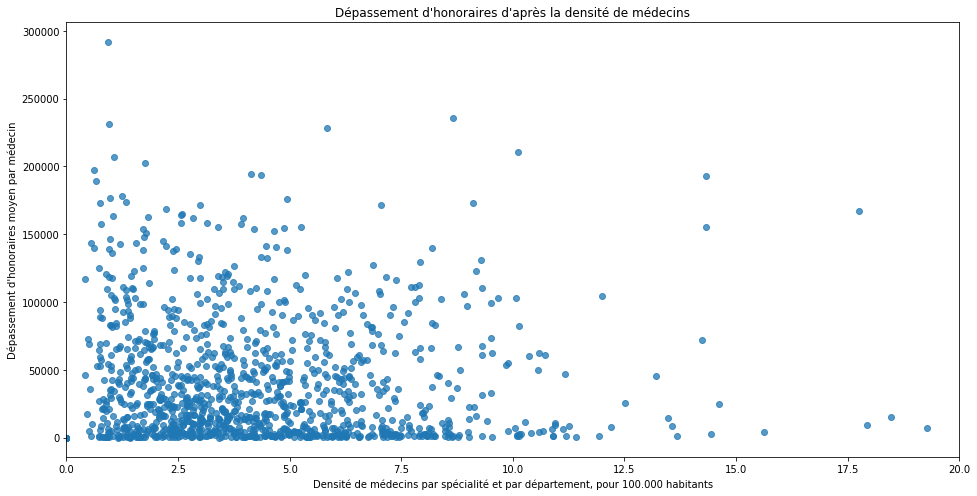

In [34]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(df_complet['DENSITE /100 000 hab.'],
           df_complet['DEPASSEMENT par médecin'], alpha=0.75)
ax.set_xlim(0, 20)
ax.set(title='Dépassement d\'honoraires d\'après la densité de médecins',
       xlabel='Densité de médecins par spécialité et par département, pour 100.000 habitants', ylabel='Dépassement d\'honoraires moyen par médecin')
plt.show()

D'après ce graphe, il ne semble pas y avoir de corrélation nette et forte entre la densité de médecins par spécialité et par département et le dépassement d'honoraires moyen par médecin.

In [39]:
df_complet.sort_values('DENSITE /100 000 hab.', ascending=False)
df_complet.groupby(['DEPARTEMENT'])

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,DEPASSEMENTS (Euros),DEPASSEMENT par médecin
2118,33- Psychiatrie,75- Paris (Ville),1339,2241346.0,59.740888,60122334.0,4.490092e+04
2084,33- Psychiatrie,33- Gironde,292,1515229.0,19.271014,2081020.0,7.126781e+03
2064,33- Psychiatrie,06- Alpes-Maritimes,200,1083268.0,18.462652,3036705.0,1.518352e+04
2067,33- Psychiatrie,13- Bouches-du-Rhône,358,1996351.0,17.932718,3209972.0,8.966402e+03
1836,15- Ophtalmologie,75- Paris (Ville),398,2241346.0,17.757187,66548497.0,1.672073e+05
2083,33- Psychiatrie,31- Haute-Garonne,205,1312022.0,15.624738,796031.0,3.883078e+03
2113,33- Psychiatrie,69- Rhône,263,1798511.0,14.623208,6501295.0,2.471975e+04
2085,33- Psychiatrie,34- Hérault,160,1107730.0,14.443953,430528.0,2.690800e+03
1220,07- Gynécologie obstétrique,75- Paris (Ville),321,2241346.0,14.321751,49862309.0,1.553343e+05
955,06- Radiodiagnostic et imagerie médicale,75- Paris (Ville),321,2241346.0,14.321751,61972743.0,1.930615e+05
